In [1]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
type(faces) # ya está programado como una clase

sklearn.utils._bunch.Bunch

(400, 64, 64)


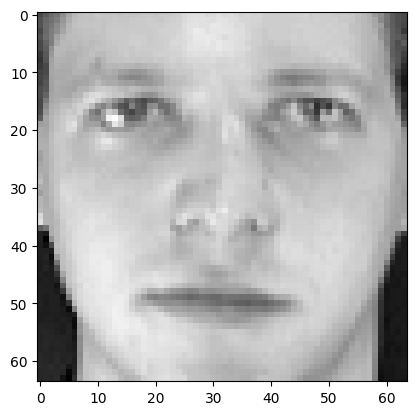

In [3]:
import matplotlib.pyplot as plt

X = faces.images
print(X.shape)
plt.imshow(X[0], cmap = 'gray')

En este caso, $X\in \mathbb{R}^{NxP}$ donde $N=400$ y $P=64x64=4090$. Por tanto necesitamos redimensionar nuestra base de datos

In [4]:
X = X.reshape(X.shape[0], -1)

In [5]:
print(X)

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]


In [6]:
import numpy as np

# singular value descomposition
U,S,Vh = np.linalg.svd(X)  # numpy devuelve a S (valores propios) de mayor a menos
print(U.shape, S.shape, Vh.shape)

(400, 400) (400,) (4096, 4096)


Como las dimensiones de Vh no coinciden, recordemos que de 400 en adelante es cero entonces no tenemos esas filas en cuenta.

In [7]:
Xe = U.dot(np.diag(S)).dot(Vh[:S.shape[0]])
print(Xe.shape)

(400, 4096)


In [8]:
error = np.linalg.norm(Xe-X, ord='fro')
print("La diferencia entre X y Xe es de:", error)

La diferencia entre X y Xe es de: 0.00026342456


Ahora veamos cómo se ve la representación de eigenvalues. Si tuviéramos que escoger la "imagen" que más aporta, deberíamos ver cuál es el valor propio mayor (siempre va a ser el primero).

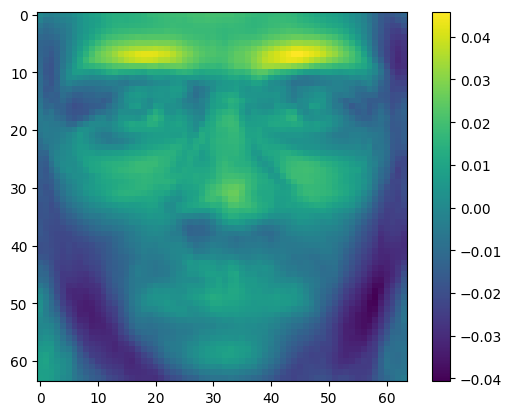

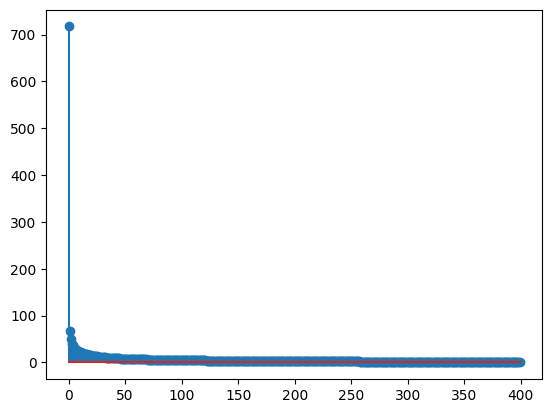

In [9]:
plt.imshow(Vh[2].reshape(64,64))
plt.colorbar()
plt.show()

plt.stem(S)
plt.show()

Representación de cada foto por cada sujeto en las primeras dos componentes

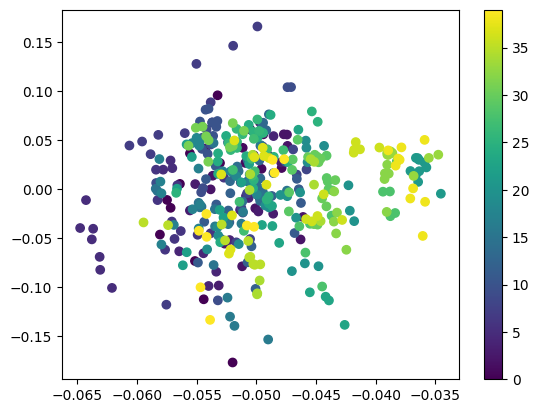

In [10]:
plt.scatter(U[:,0], U[:,1], c = faces.target)
plt.colorbar()
plt.show()

Teniendo en cuenta que $X = U S^{1/2}S^{1/2} V^* = A B^*$

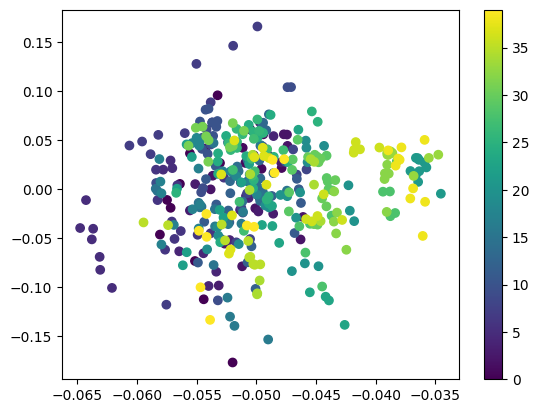

In [11]:
A = U.dot(np.diag(S**0.5))
plt.scatter(U[:,0], U[:,1], c = faces.target)
plt.colorbar()
plt.show()

Operación ortogoanl: cuando se multiplica por la matriz a la izquierda y la conjugada a la derecha ¿. Por tanto,


In [12]:
Vhm = Vh[:S.shape[0]]
iXTX = Vhm.T.dot(np.diag(S**2)).dot(Vhm) # pseudoinversa
iXTX.shape

(4096, 4096)

Tenemos que hallar  $W=(X^TX)^{-1}X^Ty$

In [13]:
y = faces.target

W = iXTX.dot(np.transpose(X)).dot(y)
W.shape

(4096,)